# Import Statements

In [5]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import pandas as pd
import numpy as np

# Ignore Warnings

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [6]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Separate X and y

In [27]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# cols = X.columns.tolist()
# newCols = [cols[5], *cols[0:5], *cols[6:]]
# X = X[newCols]
print(y.value_counts())
print(X.head())

no-recurrence-events    196
recurrence-events        81
Name: Class, dtype: int64
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up       no  
2    left_low       no  
3     left_up       no  
4   right_low       no  


# Encoding the categorical features

In [28]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0])
X.iloc[:, 1] = labelencoder_X.fit_transform(X.iloc[:, 1])
X.iloc[:, 2] = labelencoder_X.fit_transform(X.iloc[:, 2])
X.iloc[:, 3] = labelencoder_X.fit_transform(X.iloc[:, 3])
X.iloc[:, 4] = labelencoder_X.fit_transform(X.iloc[:, 4])
X.iloc[:, 5] = labelencoder_X.fit_transform(X.iloc[:, 5])
X.iloc[:, 6] = labelencoder_X.fit_transform(X.iloc[:, 6])
X.iloc[:, 7] = labelencoder_X.fit_transform(X.iloc[:, 7])
X.iloc[:, 8] = labelencoder_X.fit_transform(X.iloc[:, 8])

onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7,8])
X = pd.DataFrame(onehotencoder.fit_transform(X).toarray())
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = pd.DataFrame(labelencoder_y.fit_transform(y))

# Train-Test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [30]:
y_train[0].value_counts()

0    156
1     65
Name: 0, dtype: int64

In [31]:
y[0].value_counts()

0    196
1     81
Name: 0, dtype: int64

# LogisticRegression

## Without SMOTE

### Model Creation

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l1', tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1.5, class_weight=None, random_state=123, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
lg_model.fit(X_train, y_train)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1.5, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Cross-Validation

In [37]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=123)
# Do k-fold cross-validation
cv_results = cross_val_score(lg_model, # Model
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
print(cv_results.mean())

predicted = cross_val_predict(lg_model, X_train, y_train, cv=10)
print(metrics.accuracy_score(y_train, predicted))
print(metrics.classification_report(y_train, predicted))

0.7416666666666665
0.746606334841629
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       156
           1       0.62      0.35      0.45        65

    accuracy                           0.75       221
   macro avg       0.70      0.63      0.64       221
weighted avg       0.73      0.75      0.72       221



### Prediction and Accuracy Check

f1=0.273 auc=0.572 ap=0.590


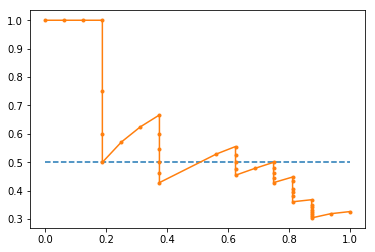

In [38]:
# predict probabilities
lg_probs = lg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# predict class values
yhat = lg_model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lg_probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, lg_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

## With SMOTE

### Import SMOTE

In [39]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

### Add SMOTE to original data

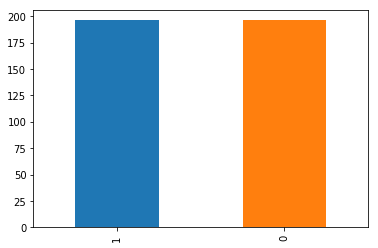

In [51]:
# SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors='deprecated',
# out_step='deprecated', kind='deprecated', svm_estimator='deprecated',
# n_jobs=1, ratio=None)
sm = SMOTE(random_state = 123, k_neighbors=5)
X_new, y_new = sm.fit_sample(X, y)
pd.Series(y_new).value_counts().plot.bar()

### Split again after adding SMOTE

In [52]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_new, y_new, test_size=0.1, random_state=1234, stratify=y_new)

### Model Creation

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l1', tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1.5, class_weight=None, random_state=123, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
lg_model.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1.5, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Cross-Validation

In [59]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=123)
# Do k-fold cross-validation
cv_results = cross_val_score(lg_model, # Model
                             X_train_sm, # Feature matrix
                             y_train_sm, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
print(cv_results.mean())

predicted = cross_val_predict(lg_model, X_train_sm, y_train_sm, cv=10)
print(metrics.accuracy_score(y_train_sm, predicted))
print(metrics.classification_report(y_train_sm, predicted))

0.672875816993464
0.6789772727272727
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       176
           1       0.69      0.65      0.67       176

    accuracy                           0.68       352
   macro avg       0.68      0.68      0.68       352
weighted avg       0.68      0.68      0.68       352



### Prediction and Accuracy Check

[[0.65139809 0.34860191]
 [0.5481605  0.4518395 ]
 [0.90749562 0.09250438]
 [0.25220364 0.74779636]
 [0.26702739 0.73297261]
 [0.67315519 0.32684481]
 [0.26365702 0.73634298]
 [0.57046633 0.42953367]
 [0.51870665 0.48129335]
 [0.36140471 0.63859529]
 [0.46301886 0.53698114]
 [0.57975936 0.42024064]
 [0.51870665 0.48129335]
 [0.64206074 0.35793926]
 [0.17018339 0.82981661]
 [0.64219695 0.35780305]
 [0.59916677 0.40083323]
 [0.6144684  0.3855316 ]
 [0.12733735 0.87266265]
 [0.3245486  0.6754514 ]
 [0.64075156 0.35924844]
 [0.6288917  0.3711083 ]
 [0.28601364 0.71398636]
 [0.19903824 0.80096176]
 [0.92825645 0.07174355]
 [0.57046633 0.42953367]
 [0.25704422 0.74295578]
 [0.13294438 0.86705562]
 [0.34663468 0.65336532]
 [0.87892342 0.12107658]
 [0.41583579 0.58416421]
 [0.62550193 0.37449807]
 [0.13871359 0.86128641]
 [0.56268267 0.43731733]
 [0.65139809 0.34860191]
 [0.86646429 0.13353571]
 [0.71633392 0.28366608]
 [0.20608616 0.79391384]
 [0.43681503 0.56318497]
 [0.2840896  0.7159104 ]]

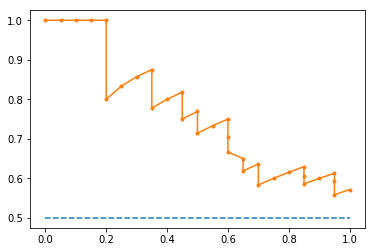

[0.32684481 0.34860191 0.35780305 0.35793926 0.35924844 0.3711083
 0.37449807 0.3855316  0.40083323 0.42024064 0.42953367 0.43731733
 0.4518395  0.48129335 0.53698114 0.56318497 0.58416421 0.63859529
 0.65336532 0.6754514  0.71398636 0.7159104  0.73297261 0.73634298
 0.74295578 0.74779636 0.79391384 0.80096176 0.82981661 0.86128641
 0.86705562 0.87266265]


In [61]:
# predict probabilities
lg_probs = lg_model.predict_proba(X_test_sm)
print(lg_probs)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# predict class values
yhat = lg_model.predict(X_test_sm)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_sm, lg_probs)
# calculate F1 score
f1 = f1_score(y_test_sm, yhat)
# calculate precision-recall AUC
auc_F = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test_sm, lg_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_F, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()
print(thresholds)